### Sprint Challenge: Natural Language Processing

In this Sprint Challenge, you will get an opportunity to work on additional exercises that will help further crystalize the concepts that you have been exposed to this week.






**Question 1**: Load the dataset  (only the first 1000 rows)related to restaurant reviews (Dataset: https://www.dropbox.com/s/i4zh5fb82x7i3sm/restaurant-test.csv?raw=1). 

This data set is a slight variation of the data set that you worked on in the project assignment.

Pre-process the dataset:

a) You will need to eliminate punctuations

b) You will have to deal with/remove stopwords

c) Tokenize the text

d) Stem or Lemmatize to determine the base form of the words

In [0]:
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

In [11]:
df = pd.read_table('https://media.githubusercontent.com/media/sulemc/nlp-sprint-challenge/master/restaurant-test.csv?raw=1',
                    nrows= 1000,
                    sep=r'/,,,,,,+/',
                    names = ['review'],
                    header = None,
                    engine = 'python')
print(df.review[0])
df.head()

My son just loves this place.  Weird that he'd ask to come here everytime we go grocery shopping (bribe) and not even care to go to Toys R Us.  Not complaining.   I'm not into little knick knacks, but they have quite a selection on little travel toys, educational materials for kids and holiday stuff.  I bought a couple of red bows with brass jingles on it and wreaths to put on my porch lights for $4!   Why is it that it's so cheap, but you can end up spending $50?,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


,review
0,My son just loves this place. Weird that he'd...
1,"""We gave it a 9, so we will make that 5-, 4,5 ..."
2,After three lunch visits I've come to the conc...
3,"""What started out as a simple attempt to find ..."
4,"If they had a Culver's on every street corner,..."


In [12]:
print(df.isnull().any().any())


False


In [13]:
#import string library to identify punctuation and the translate, maketrans ability
import string

def remove_punctuation(text):
  return text.translate(text.maketrans("", "", string.punctuation))

df['review'] = df['review'].apply(lambda val: remove_punctuation(val))
df.head()

,review
0,My son just loves this place Weird that hed a...
1,We gave it a 9 so we will make that 5 45 stars...
2,After three lunch visits Ive come to the concl...
3,What started out as a simple attempt to find a...
4,If they had a Culvers on every street corner t...


In [17]:
import nltk
nltk.download('punkt')

def tokenize_me(sentence):
  tokens = nltk.word_tokenize(sentence)
  return tokens
  
df['review'] = df['review'].apply(lambda val: tokenize_me(val))

df.head() 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,review
0,"[My, son, just, loves, this, place, Weird, tha..."
1,"[We, gave, it, a, 9, so, we, will, make, that,..."
2,"[After, three, lunch, visits, Ive, come, to, t..."
3,"[What, started, out, as, a, simple, attempt, t..."
4,"[If, they, had, a, Culvers, on, every, street,..."


In [18]:
nltk.download('stopwords')
stop_words = set(nltk.corpus.stopwords.words('english'))


def filter_stop_words(tokens):
  filtered_tokens=[]
  for w in tokens:
    if w not in stop_words:
      filtered_tokens.append(w)
  return filtered_tokens

df['review'] = df['review'].apply(lambda val: filter_stop_words(val))

df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,review
0,"[My, son, loves, place, Weird, hed, ask, come,..."
1,"[We, gave, 9, make, 5, 45, stars, n, To, start..."
2,"[After, three, lunch, visits, Ive, come, concl..."
3,"[What, started, simple, attempt, find, perfect..."
4,"[If, Culvers, every, street, corner, cardiolog..."


In [19]:
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()

def stem_it(array):
  changed_array = []
  for w in array:
    new_w = porter_stemmer.stem(w)
    changed_array.append(new_w)
  return changed_array

df_stemmed = df.copy()
df_stemmed['review'] = df_stemmed['review'].apply(lambda val: stem_it(val))

df_stemmed.head()

,review
0,"[My, son, love, place, weird, hed, ask, come, ..."
1,"[We, gave, 9, make, 5, 45, star, n, To, start,..."
2,"[after, three, lunch, visit, ive, come, conclu..."
3,"[what, start, simpl, attempt, find, perfect, b..."
4,"[If, culver, everi, street, corner, cardiologi..."


**Question 2**: **Perform Vectorization** - you will apply 3 different vectorization techniques. Each technique will generate similar document term matrices where the rows of the matrix will represent the respective text messages and the columns will represent each word or a combination of words. Note that the biggest difference between the techniques is the value depicted in the actual cells of the matrix.

1) Create a document term matrix based on the count of the words in the document. You may want to restrict the # of features/columns based on the top most features ordered by term frequency across the document

2) Create a bigram vector using a combination of adjacent words. In this case, n=2

3) Create a TF-IDF vector wherein the cells of the matrix contain values (i.e. weights) to depict how important a word is to an individual review

In [20]:
#To do this we will need sklearn's Count Vectorizer

from sklearn.feature_extraction.text import CountVectorizer

#we'll also need to reconnect the tokens into strings and put them into a list
corpus = df_stemmed['review'].apply(lambda val: ' '.join(val))

#we'll restrict the number of max features to 1000
count_vectorizer= CountVectorizer(max_features=1000)

#fit_transform the corpus and make it into an array
counts = count_vectorizer.fit_transform(corpus).toarray()

# change the array into a pandas dataframe
counts_df = pd.DataFrame(counts)

#set the names of the columns to the words, otherwise it'll be numbers
counts_df.columns = count_vectorizer.get_feature_names()

#show matrix
counts_df.head()

,10,100,12,15,20,25,30,35,50,abl,...,yelp,yesterday,yet,yogurt,you,youll,young,your,yum,yummi
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
# we'll use CountVectorizer again but now specify the ngram_range

bigram_vectorizer = CountVectorizer(ngram_range =(2,2), max_features = 1000)
bigram_matrix = bigram_vectorizer.fit_transform(corpus).toarray()

bigram_df = pd.DataFrame(bigram_matrix)
bigram_df.columns = bigram_vectorizer.get_feature_names()

bigram_df.head()

,10 minut,15 minut,20 minut,20 month,30 minut,45 minut,absolut favorit,absolut love,across street,advanc health,...,write review,year ago,year old,yelp review,you cant,you could,you get,youll find,your go,your look
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
#import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Let's set min_df, the cut off point, to 2 so as to not count any terms which
#appear less than twice
tfidf_vectorizer = TfidfVectorizer(max_features=1000, min_df=2)

tfidf = tfidf_vectorizer.fit_transform(corpus).toarray()
tfidf_df = pd.DataFrame(tfidf)
tfidf_df.columns = tfidf_vectorizer.get_feature_names()

tfidf_df.head()

,10,100,12,15,20,25,30,35,50,abl,...,yelp,yesterday,yet,yogurt,you,youll,young,your,yum,yummi
0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.259798,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.148411,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.158578,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.042306,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.08173,0.0,0.0,0.082888,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


**Question 3: ** 

**a)** Train the Word2vec model with tokenized content; size of the word vectors is 5; the word should show-up at least once in the raw content

**b)** List the number of words in the model's vocabulary

**c)**Examine word similarity to the word "awesome" and "loves"

**d)**Consider each review to be a document on its own. Examine document similarity with Doc2vec to any body of text of your choice

In [23]:
#install gensim
!pip install --upgrade gensim

    100% |████████████████████████████████| 23.6MB 1.6MB/s 
    100% |████████████████████████████████| 1.4MB 16.3MB/s 
    100% |████████████████████████████████| 133kB 31.4MB/s 
    100% |████████████████████████████████| 61kB 28.9MB/s 
    100% |████████████████████████████████| 4.7MB 5.9MB/s 
    100% |████████████████████████████████| 552kB 30.1MB/s 
  Running setup.py bdist_wheel for smart-open ... - \ done
  Stored in directory: /root/.cache/pip/wheels/23/00/44/e5b939f7a80c04e32297dbd6d96fa3065af89ecf57e2b5f89f
  Running setup.py bdist_wheel for bz2file ... - done
  Stored in directory: /root/.cache/pip/wheels/81/75/d6/e1317bf09bf1af5a30befc2a007869fa6e1f516b8f7c591cb9
Successfully built smart-open bz2file


In [24]:
from gensim.models import Word2Vec

#take non-stemmed tokens and convert them into a list
#I chose non-stemmed because the stemming process changes
#awesome and loves
sentences = df["review"].tolist()

#set min_count to 1 and size of word vectors to 5
model = Word2Vec(sentences, min_count = 1, size = 5)

print(model)

Word2Vec(vocab=17069, size=5, alpha=0.025)


In [25]:
model.wv.similar_by_word('awesome')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('options', 0.9999344348907471),
 ('fine', 0.999923050403595),
 ('tip', 0.999907374382019),
 ('manager', 0.9998840689659119),
 ('rude', 0.9998629093170166),
 ('already', 0.9998470544815063),
 ('completely', 0.9998252391815186),
 ('helpful', 0.9997997283935547),
 ('many', 0.9997985363006592),
 ('real', 0.9997917413711548)]

In [26]:
model.wv.similar_by_word('loves')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('received', 0.9998044371604919),
 ('smaller', 0.9997799396514893),
 ('current', 0.9997068643569946),
 ('except', 0.9996812343597412),
 ('paper', 0.9996562600135803),
 ('fantastic', 0.9995405077934265),
 ('offer', 0.9994977116584778),
 ('ring', 0.9994859099388123),
 ('feeling', 0.9994671940803528),
 ('recommendations', 0.9994136691093445)]

In [27]:
#First we need to convert each review into a tagged document

from gensim.models.doc2vec import TaggedDocument

#we'll go through the list of reviews and pass each list of word tokens and the
#index to the TaggedDocument function to create the tagged documents for Doc2Vec
tagged_documents = []
for i, sentence in enumerate(sentences):
  tagged_documents.append(TaggedDocument(sentence,[i]))
  
tagged_documents[:10]

[TaggedDocument(words=['My', 'son', 'loves', 'place', 'Weird', 'hed', 'ask', 'come', 'everytime', 'go', 'grocery', 'shopping', 'bribe', 'even', 'care', 'go', 'Toys', 'R', 'Us', 'Not', 'complaining', 'Im', 'little', 'knick', 'knacks', 'quite', 'selection', 'little', 'travel', 'toys', 'educational', 'materials', 'kids', 'holiday', 'stuff', 'I', 'bought', 'couple', 'red', 'bows', 'brass', 'jingles', 'wreaths', 'put', 'porch', 'lights', '4', 'Why', 'cheap', 'end', 'spending', '50'], tags=[0]),
 TaggedDocument(words=['We', 'gave', '9', 'make', '5', '45', 'stars', 'n', 'To', 'start', 'beautiful', 'lucked', 'outside', 'heater', 'next', 'roaring', 'fireplace', 'The', 'service', 'could', 'better', 'thanks', 'YELPing', 'friends', 'hardly', 'needed', 'menu', 'n', 'The', 'Portugese', 'clam', 'soup', 'souper', 'though', 'salty', 'side', 'The', 'pork', 'belly', 'hook', 'steak', 'tacos', 'tops', 'We', 'gave', 'dishes', '9', '95', '95', 'respectivleyn', 'Margaritas', 'awesome', 'Smokehouse', 'Pomogran

In [28]:
# then we'll run the Doc2Vec model

from gensim.models import Doc2Vec

doc2vec_model = Doc2Vec(tagged_documents,
                        vector_size=100,
                        min_count=5,
                        epochs=100 )
print(doc2vec_model)

Doc2Vec(dm/m,d100,n5,w5,mc5,s0.001,t3)


In [29]:
#now let's grab a review off of yelp to compare to each review

tester = "The part that really ruined this dinner on top of the underwhelming food was the ridiculous wait We received our last dish an hour and forty minutes after 7pm It was small dish after small dish with too much time in between Honestly I wanted to leave without eating out last dish because the wait was becoming unbearable"
tester = tokenize_me(tester)
tester = filter_stop_words(tester)
print(tester)

['The', 'part', 'really', 'ruined', 'dinner', 'top', 'underwhelming', 'food', 'ridiculous', 'wait', 'We', 'received', 'last', 'dish', 'hour', 'forty', 'minutes', '7pm', 'It', 'small', 'dish', 'small', 'dish', 'much', 'time', 'Honestly', 'I', 'wanted', 'leave', 'without', 'eating', 'last', 'dish', 'wait', 'becoming', 'unbearable']


In [30]:
#infer a new vector to be done once the model has been run
test_vec = doc2vec_model.infer_vector(tester)
#check test vector against all other reviews for similiarity
doc2vec_model.docvecs.most_similar([test_vec])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[(852, 0.35996928811073303),
 (132, 0.34059926867485046),
 (917, 0.3357577621936798),
 (397, 0.3300137519836426),
 (89, 0.3205152750015259),
 (642, 0.3160513937473297),
 (508, 0.29337334632873535),
 (252, 0.2928923964500427),
 (464, 0.29191118478775024),
 (790, 0.28474387526512146)]

In [31]:
#let's take look at the review which was the most similar to the test document
print(sentences[345])

['I', 'guessed', 'Saturday', 'night', 'I', 'droolingdreaming', 'aboutover', 'pictures', 'cheese', 'plates', 'bruschetta', 'since', 'frequenting', 'yelp', 'Every', 'weekend', 'I', 'would', 'put', 'going', 'swearing', 'I', 'would', 'get', 'next', 'time', 'I', 'finally', 'made', 'absolutely', 'disappointednnI', 'tend', 'stay', 'away', 'super', 'trendy', 'places', 'cheat', 'meals', 'generally', 'include', 'least', 'two', 'places', 'small', 'time', 'window', 'The', 'wait', 'usually', 'really', 'long', 'although', 'service', 'usually', 'good', 'food', 'wait', 'time', 'usually', 'therennI', 'came', 'fully', 'prepared', 'wait', 'mediocre', 'bad', 'service', 'based', 'reviews', 'Ive', 'read', 'I', 'pleasantly', 'surprised', 'topics', 'We', 'instantly', 'greeted', 'door', 'niceenthusiastic', 'hostess', 'She', 'apologized', 'couldnt', 'seat', 'us', 'right', 'away', 'helped', 'us', 'find', 'comfortable', 'place', 'stand', 'wait', 'table', 'The', 'wait', '1520', 'minutes', 'Fearing', 'service', 'I'

**Question 4: **Iterate over the reviews and output the polarity and subjectivity of the respective tweets. What is the underlying trend with respect to polarity (i.e. positive or negative)?

In [32]:
# For this we'll need textblob

!pip install -U textblob

    100% |████████████████████████████████| 634kB 8.2MB/s 


In [33]:
from textblob import TextBlob

#now we need to convert each review into a textblob
#text blob takes the input of string sentences so I must join the string tokens
text_blobs = []
for sentence in sentences:
  text_blobs.append(TextBlob(' '.join(sentence)))

#text blob automatically accesses the polarity and subjectivity of each blob
#"The polarity score is a float within the range [-1.0, 1.0]. The subjectivity 
#is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is
#very subjective." - from the docs
print(text_blobs[10].sentiment)

Sentiment(polarity=0.21164321789321788, subjectivity=0.5206094831094831)


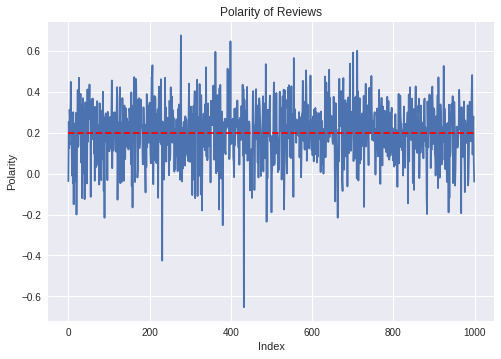

In [34]:
#Now we can graph the polarity to look for underlying trends
import matplotlib.pyplot as plt

polarities=[]
for blob in text_blobs:
  polarities.append(blob.sentiment.polarity)

polarities = np.asarray(polarities)
polarities_mean = [polarities.mean()]*len(polarities)

plt.plot(polarities)
plt.plot(range(len(polarities)),polarities_mean, linestyle='--', color = 'r')
plt.xlabel("Index")
plt.ylabel("Polarity")
plt.title("Polarity of Reviews")
plt.show()

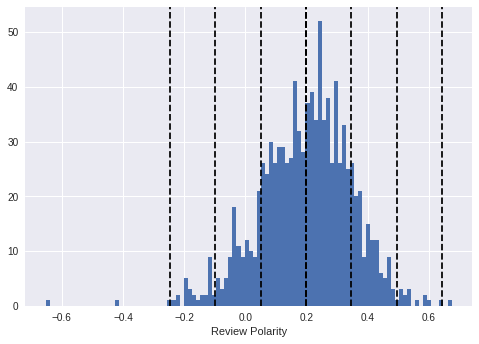

In [35]:

sigma = polarities.std()
mu = polarities_mean[0]
std_lines = [mu]
for i in range(4):
  std_lines.append(mu - sigma*i)
  std_lines.append(mu + sigma*i)

plt.hist(polarities, bins=100)
plt.xlabel('Review Polarity')
for value in std_lines:
  plt.axvline(value, color = 'k', linestyle = '--')
plt.show()

**Question 5:** Train a Naive Bayes classifier on a subset of the movie_reviews data set which is part of the NLTK corpus. Once the classifier has been trained, evaluate it's accuracy by testing it against a subset of data from the movie_reviews data set. 

**Step 1**: Import the data set from the nltk corpus

**Step 2**: Examine the categories within the movie_reviews data set

**Step 3**: Examine the files that constitute the movie_reviews data set

**Step 4**: Store a list of words for each file ID, followed by the positive or negative label in one big list.
*Note *that each review has its own ID

**Step 5**:  Randomize the items of a list in place. This is required since there is a high likelihood that we would train on all of the negatives, some positives, and then test only against positives

**Step 6**: Find the most-used words in the text and count how often they are used

**Step 7**: Select the top 5,000 most common words

**Step 8**: Iterate  over the top 5,000  words and build a **feature set **that contains words from across the reviews including whether the word is among the top 5000 words and the corresponding category 

**Step 9**: First split the feature set list in a training and testing subsets


**Step 10**: Train the Naive Bayes Classifier model with the training data set

**Step 11**: Evaluate the accuracy of the model against the testing subset

**Step 12**: Output the most informative features - (for example: which features appear more often in a postive review as compared to a negative review or vice versa).



In [36]:
#Step 1
  import nltk
  nltk.download("movie_reviews")
  from nltk.corpus import movie_reviews

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


In [37]:
#Step 2 Examine the categories within the movie_reviews data set
print('Categories:', movie_reviews.categories())

Categories: ['neg', 'pos']


In [38]:
#Step 3 Examine the files that constitute the movie_reviews data set
print('How many files?', len(movie_reviews.fileids()))
print('Ids', movie_reviews.fileids())

How many files? 2000
Ids ['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt', 'neg/cv010_29063.txt', 'neg/cv011_13044.txt', 'neg/cv012_29411.txt', 'neg/cv013_10494.txt', 'neg/cv014_15600.txt', 'neg/cv015_29356.txt', 'neg/cv016_4348.txt', 'neg/cv017_23487.txt', 'neg/cv018_21672.txt', 'neg/cv019_16117.txt', 'neg/cv020_9234.txt', 'neg/cv021_17313.txt', 'neg/cv022_14227.txt', 'neg/cv023_13847.txt', 'neg/cv024_7033.txt', 'neg/cv025_29825.txt', 'neg/cv026_29229.txt', 'neg/cv027_26270.txt', 'neg/cv028_26964.txt', 'neg/cv029_19943.txt', 'neg/cv030_22893.txt', 'neg/cv031_19540.txt', 'neg/cv032_23718.txt', 'neg/cv033_25680.txt', 'neg/cv034_29446.txt', 'neg/cv035_3343.txt', 'neg/cv036_18385.txt', 'neg/cv037_19798.txt', 'neg/cv038_9781.txt', 'neg/cv039_5963.txt', 'neg/cv040_8829.txt', 'neg/cv041_22364.txt', 'neg/cv042_11927

In [39]:
#Step 4 Store a list of words for each file ID, followed by the positive or
#negative label in one big list


movie_review_tuples = []
for review in movie_reviews.fileids():
  review_words = movie_reviews.words(review)
  review_words = filter_stop_words(review_words)
  review_words = tokenize_me(remove_punctuation(' '.join(review_words)))
  movie_review_tuples.append((review_words, movie_reviews.categories(review)[0], review))
  
print(movie_review_tuples[0][0])
print(movie_review_tuples[0][1])
print(movie_review_tuples[0][2])

['plot', 'two', 'teen', 'couples', 'go', 'church', 'party', 'drink', 'drive', 'get', 'accident', 'one', 'guys', 'dies', 'girlfriend', 'continues', 'see', 'life', 'nightmares', 'deal', 'watch', 'movie', 'sorta', 'find', 'critique', 'mind', 'fuck', 'movie', 'teen', 'generation', 'touches', 'cool', 'idea', 'presents', 'bad', 'package', 'makes', 'review', 'even', 'harder', 'one', 'write', 'since', 'generally', 'applaud', 'films', 'attempt', 'break', 'mold', 'mess', 'head', 'lost', 'highway', 'memento', 'good', 'bad', 'ways', 'making', 'types', 'films', 'folks', 'snag', 'one', 'correctly', 'seem', 'taken', 'pretty', 'neat', 'concept', 'executed', 'terribly', 'problems', 'movie', 'well', 'main', 'problem', 'simply', 'jumbled', 'starts', 'normal', 'downshifts', 'fantasy', 'world', 'audience', 'member', 'idea', 'going', 'dreams', 'characters', 'coming', 'back', 'dead', 'others', 'look', 'like', 'dead', 'strange', 'apparitions', 'disappearances', 'looooot', 'chase', 'scenes', 'tons', 'weird', '

In [40]:
#step 5 Randomize the items of a list in place.

import random

random.shuffle(movie_review_tuples)
print(movie_review_tuples[0][0])
print(movie_review_tuples[0][1])

['woof', 'bad', 'leap', 'faith', 'title', '1992', 'comedy', 'starring', 'steve', 'martin', 'debra', 'winger', 'required', 'watch', 'incredulous', 'howler', 'starring', 'bruce', 'willis', 'things', 'psychologist', 'since', 'reagan', 'administration', 'acting', 'stretch', 'magnitude', 'alas', 'mickey', 'rourke', 'hardly', 'knew', 'ye', 'story', 'opens', 'campy', 'kick', 'willis', 'treating', 'patient', 'abruptly', 'steps', 'window', 'take', 'best', 'flying', 'leap', 'since', 'charles', 'durning', 'dove', 'hudsucker', 'proxy', 'goes', 'splat', 'goes', 'ugh', 'character', 'spends', 'rest', 'film', 'colorblind', 'really', 'good', 'doctor', 'moves', 'sunny', 'l', 'rooms', 'old', 'college', 'chum', 'scott', 'bakula', 'therapist', 'getting', 'death', 'threats', 'someone', 'monday', 'evening', 'group', 'buddy', 'bites', 'second', 'reel', 'surprise', 'willis', 'agrees', 'take', 'group', 'death', 'threats', 'troubles', 'therapy', 'man', 'willis', 'gets', 'share', 'cut', 'nc17', 'love', 'scenes', 

In [0]:
#step 6 Find the most-used words in the text and count how often they are used

# I want to use nltk.FreqDist but I first need to put all the words into one list
all_words = []
for i in range(0, len(movie_review_tuples), 1 ):
  review = movie_review_tuples[i][0]
  for word in review:
    all_words.append(word)
    
freq_dist = nltk.FreqDist(w.lower() for w in all_words)

In [42]:
#test it out
print(freq_dist.most_common(10))

[('film', 9519), ('one', 5853), ('movie', 5774), ('like', 3690), ('even', 2565), ('good', 2411), ('time', 2411), ('story', 2170), ('would', 2110), ('much', 2050)]


In [43]:
#Step 7: Select the top 5,000 most common words
top_5000 = freq_dist.most_common(5000)
print(top_5000[4999])

('witnessed', 22)


In [44]:
#Step 8: Iterate over the top 5,000 words and build a feature set that contains
#words from across the reviews including whether the word is among the top 5000
#words and the corresponding category


#I'm going to go through each review and map how many times each of the top 
#5000 words appear in the review. To do this I need a list of the the top 5000
#words which has indicies so that I can use that as a reference for what the words are

#make a list
top_5000_list = []
for word in top_5000:
  top_5000_list.append(word[0])
print(top_5000_list[:10])

['film', 'one', 'movie', 'like', 'even', 'good', 'time', 'story', 'would', 'much']


In [45]:
review_check = []

for i in range(0, len(movie_review_tuples), 1 ):
  review = movie_review_tuples[i][0]
  review_top_word_counts = np.zeros(5000)
  for word in review:
    try: 
      index = top_5000_list.index(word)
      if review_top_word_counts[index] == 0:
        review_top_word_counts[index] += 1
    except ValueError:
      continue
  review_check.append(review_top_word_counts)

np.row_stack(review_check)
print(review_check[0])

[1. 1. 1. ... 0. 0. 0.]


In [46]:
sentiment_check = []
for i in range(0, len(movie_review_tuples), 1 ):
  sentiment = movie_review_tuples[i][1]
  if sentiment == 'pos':
    sentiment_check.append(1)
  else:
    sentiment_check.append(0)
    
print(len(review_check))
print(len(sentiment_check))

2000
2000


In [0]:
#Step 9: First split the feature set list in a training and testing subsets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(review_check, sentiment_check, test_size=0.2)

In [48]:
#Step 10: Train the Naive Bayes Classifier model with the training data set

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train, y_train)

#Step 11: Evaluate the accuracy of the model against the testing subset
model.score(X_test, y_test)

0.84

In [49]:
#Step 12: Output the most informative features

top_20_coef = model.coef_[0][:20]
top_20_coef = top_20_coef.tolist()
top_20_indicies_coef = []
top_20_indicies_coef.extend(range(20))

for i, feature in enumerate(model.coef_[0], start = 20):
  max_20 = max(top_20_coef)
  min_20 = min(top_20_coef)
  if feature < min_20:
      break
  if feature > min_20:
    index = top_20_coef.index(min_20)
    top_20_coef[index] = feature
    top_20_indicies_coef[index] = i

for i in top_20_indicies_coef:
  print(top_5000_list[i])

film
one
movie
like
even
good
time
story
man
much
people
also
plot
could
well
life
scene
little
films
really


**Question 6: ** Write a blog post on how you could apply one or more of the techniques that you have learned this week. The recommended approach would be explore a data set (Netflix reviews or Yelp reviews) and utilize text processing that we have covered to derive insights from the body of text.
